# Univariate EDA with domestice flight-performance data

In this lesson, you will learn various way of performing univariate exploratory data analysis in Pandas. In univariate analysis, each feature is explored individually independent of others. Bivariate analysis will be covered in the next lesson. We will use the open source data on on-time performance of domestics flights. The data for this exercise was downloaded from [Kaggle](https://www.kaggle.com/usdot/flight-delays).



We will explore the data in relation to the following questions:

#### 1. What kind of features (variables or columns) are there? Is there any need for type conversion?

#### 2. How is the data distributed across different features?

#### 3. Is there any need for data cleaning? 

These questions are asked with a supposed goal of building a predictive model for flight delays in the future.

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.

### 1. What diferent features (variables or columns) do you have in your data? What are their  types? Is there any need for type conversion?



First load the data into pandas dataframe.

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
DATA_DIR = "/home/asimbanskota/t81_577_data_science/weekly_materials/week7/files"

In [8]:
for f in os.listdir(DATA_DIR):
    print (f)

airlines.csv
airports.csv
flights.csv
ORD.csv


ailrlines.csv: airlines related data <br>
airports.csv:  airport related information<br>
flights.csv: flight related features<br>

### Read flights.csv into a dataframe. 



In [4]:
flights = os.path.join(DATA_DIR, 'flights.csv')
with open(flights) as file:
    n_rows = len(file.readlines())

print (f'Exact number of rows: {n_rows}')

Exact number of rows: 5819080


The csv file has about 6 million rows: in case you run into memory issue during this exercise, you can import only few rows using `nrows` arg for data inspection:
```python
df = pd.read_csv(csv_file_name, nrows = 1000)
```
After inspecting the columns names, you can import entire rows but only the columns that need exploration or process data in chunks as you learned last week:

```python
df = pd.read_csv(csv_file_name, names= ['col1' 'col2', 'col3'])
```

In [12]:
df= pd.read_csv(flights)

Always start with checking the shape or dimension of the dataframe.

In [13]:
df.shape

(5819079, 31)


Each record corresponds to a single flight in the US in 2015 described by 31 features. The complete description of the features is found [here](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time). Some of the relevant variables for this exercise are:

YEAR, MONTH, DAY, DAY_OF_WEEK: dates of the flight <br>
AIRLINE: id for airline <br>
ORIGIN_AIRPORT and DESTINATION_AIRPORT: code airports <br>
SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL : scheduled times of take-off and landing <br>
DEPARTURE_TIME and ARRIVAL_TIME: real times at which take-off and landing took place <br>
DEPARTURE_DELAY and ARRIVAL_DELAY: difference (in minutes) between planned and real times <br>
DISTANCE: distance (in miles) 

Occasionally, a first peek of a dataframe using either `head()` and `tail()` method or `info()` might inform you right away about the need for replacing some values or changing data types.

In [14]:
pd.set_option('display.max_columns', 50)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.00,-11.00,21.00,15.00,205.00,194.00,169.00,1448,404.00,4.00,430,408.00,-22.00,0,0,NaN,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.00,-8.00,12.00,14.00,280.00,279.00,263.00,2330,737.00,4.00,750,741.00,-9.00,0,0,NaN,nan,nan,nan,nan,nan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.00,-2.00,16.00,34.00,286.00,293.00,266.00,2296,800.00,11.00,806,811.00,5.00,0,0,NaN,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.00,-5.00,15.00,30.00,285.00,281.00,258.00,2342,748.00,8.00,805,756.00,-9.00,0,0,NaN,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.00,-1.00,11.00,35.00,235.00,215.00,199.00,1448,254.00,5.00,320,259.00,-21.00,0,0,NaN,nan,nan,nan,nan,nan


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

 One thing you might have noticed that the flight date is not described in a single column and is not in a convenient `datetime` format. We will take care of that [here](temporal-variability-EDA.ipynb) in temporal analyis.

There are many ways you can replace certain values in a dataframe. One way is to use `map` method by passing a dictionary of the form ```{old_value: new_value}``` as its argument. For example, the unique values for `DIVERTED` column is 0 and 1. We can replace those values with True and False as below:

In [12]:
df.DIVERTED.unique()

array([0, 1])

In [13]:
dic = {1: True, 0: False}
df['DIVERTED'] = df['DIVERTED'].map(dic)
df.DIVERTED.unique()

array([False,  True])

Alternatively, `replace` method can also be used for the purpose. 

In [14]:
df.DIVERTED = df.DIVERTED.replace(dic)

Dataframe column method `astype()` can be used to change data types. Flight data has column `CANCELLED` with 1 and 0 values of `int` type. Let's change that to `bool` type:

In [16]:
df.CANCELLED = df.CANCELLED.astype(bool)

## 2. How are the features values distributed in data?
- for general understanding of the features
- to determine any need for applying transformations 
- for outlier detection

`dataframe.describe()` method can be used to obtain some descriptive statistics on features and get an initial feel for your data. This process of inspecting the general characteristics of your data is also called data profiling that can guide you to tansform and handle your data differently.

In [99]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,97702.000000,97702.000000,97629.000000,97629.000000,100000.000000,97387.000000,97387.000000,100000.000000,97560.000000,97560.000000,100000.000000,97560.00000,97387.000000,34625.000000,34625.000000,34625.000000,34625.000000,34625.000000
mean,2015.0,1.0,3.733920,4.107310,2240.827980,1306.348280,1326.265614,19.937749,17.155917,1348.426154,143.039340,142.362995,117.098032,830.389430,1454.528690,8.117876,1481.115620,1458.02992,18.342304,14.026801,0.070787,17.853921,26.014556,2.751971
std,0.0,0.0,1.815542,2.098451,1818.712658,482.325506,503.509117,45.843577,10.738373,504.142807,76.234984,76.649792,74.306645,609.183228,532.926016,7.561132,498.916358,538.21177,48.878234,25.965405,1.692526,43.527539,42.593343,17.265760
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,23.000000,17.000000,8.000000,31.000000,1.000000,1.000000,1.000000,1.00000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,2.000000,2.000000,759.000000,904.000000,911.000000,-3.000000,11.000000,928.000000,86.000000,85.000000,62.000000,377.000000,1046.000000,4.000000,1100.000000,1050.00000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,4.000000,4.000000,1693.000000,1300.000000,1317.000000,3.000000,14.000000,1330.000000,125.000000,125.000000,98.000000,669.000000,1452.000000,6.000000,1500.000000,1455.00000,4.000000,4.000000,0.000000,4.000000,10.000000,0.000000
75%,2015.0,1.0,5.000000,6.000000,3394.000000,1720.000000,1739.000000,25.000000,20.000000,1753.000000,175.000000,177.000000,150.000000,1069.000000,1907.000000,9.000000,1908.000000,1911.00000,27.000000,19.000000,0.000000,19.000000,35.000000,0.000000
max,2015.0,1.0,7.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,718.000000,724.000000,676.000000,4983.000000,2400.000000,179.000000,2359.000000,2400.00000,1384.000000,590.000000,107.000000,1380.000000,891.000000,562.000000


Features of object and boolean type can also be described using `include` argument.

In [17]:
# Describing all the Categorical Features
df.describe(include=['O', 'Bool'])

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DIVERTED,CANCELLATION_REASON
count,5819079,5804358,5819079,5819079,5819079,89884
unique,14,4897,930,930,2,4
top,WN,N480HA,ATL,ATL,False,B
freq,1261855,3768,346836,346904,5803892,48851


### Plotting univariate distributions

**Histogram**

Histogram is the most basic graph for exploring a continious feature. A histogram represents the distribution of data by forming bins along a range of values and drawing bars to represent frequency (count) or proportion (count/total count).

The internal process of histogram drawing is:

- define the range of data for each bin, 
- count how many cases fall in each bin, 
- and draw the bars high enough to indicate the count.

A histogram can be drawn in seaborn using distplot() method.
For bigger datset, it is convenient to sample some percentage of data for quick plotting.


In [17]:
dfs = df.sample(frac = 0.1)

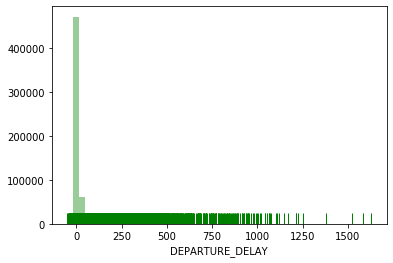

In [19]:
sns.distplot(dfs.DEPARTURE_DELAY, color = 'green', kde=False, rug=True);

It looks like the delay time is highly skewed with large number of values clustered arround zero, probably because most flights depart on time or with minimum delays.

In [29]:
df.DEPARTURE_DELAY.describe()

count   5732926.00
mean          9.37
std          37.08
min         -82.00
25%          -5.00
50%          -2.00
75%           7.00
max        1988.00
Name: DEPARTURE_DELAY, dtype: float64

It looks like 75 percent of the flights departed within 7 minutes of scheduled time. Based upon such knowledge, it might be helpful to think thorugh what amount of delay acutally constitute a delay. Once that got figured out,  delay categories for each flight can be defined like below using Pandas `cut` method. This is a simple example of feature engineering in which a new feature is derived from the existing ones.

In [19]:
df['delay_class'] = pd.cut(x=df['DEPARTURE_DELAY'], bins=[df['DEPARTURE_DELAY'].min(), 7, 20, 45, df['DEPARTURE_DELAY'].max()],
                            labels=['no_delay', 'small_delay', 'moderate_delay', 'large_delay'])

In [20]:
df.delay_class.value_counts()

no_delay          4315624
small_delay        560249
large_delay        443974
moderate_delay     413078
Name: delay_class, dtype: int64

Now we can plot the distributions for individual delay categories in subplots.

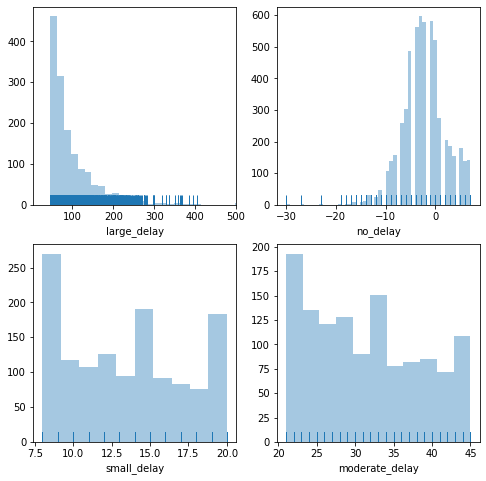

In [106]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
for cl, ax in zip(dfs.delay_class.unique(), axes.flat):
    dfs_sub = dfs[dfs.delay_class == cl]
    
    sns.distplot(dfs_sub.DEPARTURE_DELAY, kde=False, rug=True, ax=ax);
    
    if cl == 'large_delay':
        
        ax.set_xlim(None, 500)
    ax.set_xlabel(cl)

#### Boxplot

Boxplots are very good at presenting information about the central tendency, symmetry and skew, as well as outliers. One of the best uses of boxplots is in the form of side-by-side boxplots as shown below. In this case, however, the greater spread in `large_delay` category masked the information on other boxplots.  


In [23]:
df_small = df[df.delay_class != 'large_delay']

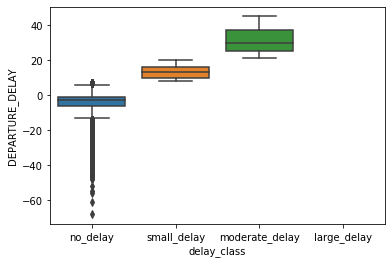

In [24]:
ax = sns.boxplot(x="delay_class", y="DEPARTURE_DELAY", data=df_small)

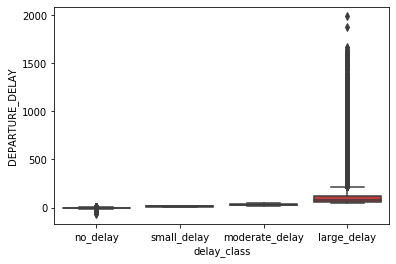

In [27]:
ax = sns.boxplot(x="delay_class", y="DEPARTURE_DELAY", data=df)

One waythe box plot can be useful in identifying the presence of an oulier. However, the designation of an observation as an outlier should be considered as just a suggestion that the points might be mistakes or otherwise unusual. The definition of outlier varies depending upon the purpose and situation, and hence should be guided by informed criteria.

## 3. Is there any need to clean data? Specifically,

- Are there any missing values?

- Are there values such as  ±Inf?
- Are there any outliers?
- Are their obvious inconsistencies in data such as unreasonable dates, age of person ( negative/very high) etc?

We can replace values like ±Inf using .replace method.

In [28]:
df.FLIGHT_NUMBER.replace({np.inf:np.nan, np.NINF:np.nan})

0            98
1          2336
2           840
3           258
4           135
           ... 
5819074     688
5819075     745
5819076    1503
5819077     333
5819078     839
Name: FLIGHT_NUMBER, Length: 5819079, dtype: int64

In [29]:
con = df.DEPARTURE_DELAY > 0
df = df[con]

### Missing values by columns
Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [30]:
dfs.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              1455
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           8382
DEPARTURE_DELAY          8382
TAXI_OUT                 8679
WHEELS_OFF               8679
SCHEDULED_TIME              1
ELAPSED_TIME            10242
AIR_TIME                10242
DISTANCE                    0
WHEELS_ON                9026
TAXI_IN                  9026
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             9026
ARRIVAL_DELAY           10242
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    573133
AIR_SYSTEM_DELAY       475725
SECURITY_DELAY         475725
AIRLINE_DELAY          475725
LATE_AIRCRAFT_DELAY    475725
WEATHER_DELAY          475725
dtype: int64

One way of dealing with missing values is to simply drop them when the data size is very big compared to the rows with missing values. However, sometimes the missing value can carry unique information. There are different ways to deal with missing values. We will go through some of them in little more depth in the next week lecture. 

To drop rows with missing value in certain columns, the column name can be supplied inside the list of the subset argument of dropna method of a dataframe as below.

In [31]:
df = df.dropna(subset = ["DEPARTURE_DELAY"])